In [108]:
#import dependencies 
import pandas as pd
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
from scipy import stats


#import csv's 
nba_seasons = "Seasons_Stats.csv"
nba_players = "Players.csv"
nba_players_data = "player_data.csv"


In [3]:
#write csv's to data frames 
nba_seasons_df = pd.read_csv(nba_seasons)
nba_players = pd.read_csv(nba_players)
nba_players_data = pd.read_csv(nba_players_data)


In [3]:
#view data frame
nba_seasons_df.head()

#how many unique player names do we have
nba_seasons_df['Player'].nunique()

3921

In [4]:
#view data frame
nba_players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [5]:
#number of total players in this data set
len(nba_players['Player'])

3922

In [6]:
#number of unique players in this data set
nba_players['Player'].nunique()

3921

In [7]:
#see data frame of third csv
nba_players_data.head()



,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [8]:
#take the data frame and rename the column name to player for consistency 
renamed_nba_players_data =nba_players_data.rename(columns ={'name':'Player'})
renamed_nba_players_data.head()

#how many total players in this list
len(renamed_nba_players_data['Player'])


4550

In [9]:
#how many unique players
renamed_nba_players_data['Player'].nunique()

4500

In [10]:
nba_seasons_df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [11]:


#take data frame and create new data frame with these columns
clean_df = nba_seasons_df[{'Year', 'Player','G', 'FG', 'TRB',
       'AST', 'STL', 'BLK', 'PTS',"Pos"}]


#drop all nan values- for purpose of comparison 
datax = clean_df.dropna()
datax.head()


,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB
3851,1974.0,79.0,C,166.0,104.0,Zaid Abdul-Aziz,336.0,80.0,865.0,923.0
3852,1974.0,81.0,C,386.0,283.0,Kareem Abdul-Jabbar*,948.0,112.0,2191.0,1178.0
3853,1974.0,74.0,SF,141.0,12.0,Don Adams,303.0,110.0,759.0,448.0
3854,1974.0,55.0,PG,56.0,1.0,Rick Adelman,64.0,36.0,182.0,69.0
3855,1974.0,72.0,PG,374.0,22.0,Lucius Allen,526.0,137.0,1268.0,291.0


In [12]:
#remove rows for players before 1980
df_1980 = datax[datax['Year'] >= 1980] 
df_1980.head()

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB
5727,1980.0,82.0,C,371.0,280.0,Kareem Abdul-Jabbar*,835.0,81.0,2034.0,886.0
5728,1980.0,67.0,PF,87.0,12.0,Tom Abernethy,153.0,35.0,362.0,191.0
5729,1980.0,75.0,C,322.0,55.0,Alvan Adams,465.0,108.0,1118.0,609.0
5730,1980.0,80.0,PG,671.0,10.0,Tiny Archibald*,383.0,106.0,1131.0,197.0
5731,1980.0,26.0,C,40.0,15.0,Dennis Awtrey,27.0,12.0,86.0,115.0


In [13]:
#remove row for players after 2010
df_2010 = df_1980[df_1980['Year'] <= 2010] 
df_2010.head()

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB
5727,1980.0,82.0,C,371.0,280.0,Kareem Abdul-Jabbar*,835.0,81.0,2034.0,886.0
5728,1980.0,67.0,PF,87.0,12.0,Tom Abernethy,153.0,35.0,362.0,191.0
5729,1980.0,75.0,C,322.0,55.0,Alvan Adams,465.0,108.0,1118.0,609.0
5730,1980.0,80.0,PG,671.0,10.0,Tiny Archibald*,383.0,106.0,1131.0,197.0
5731,1980.0,26.0,C,40.0,15.0,Dennis Awtrey,27.0,12.0,86.0,115.0


In [14]:
type(df_2010)

pandas.core.frame.DataFrame

In [15]:
df_2010.to_csv('test.csv')

In [16]:
#ensure that we have data for all relevent fields
df_2010.count()

Year      14743
G         14743
Pos       14743
AST       14743
BLK       14743
Player    14743
FG        14743
STL       14743
PTS       14743
TRB       14743
dtype: int64

In [17]:
df_2010.dtypes

Year      float64
G         float64
Pos        object
AST       float64
BLK       float64
Player     object
FG        float64
STL       float64
PTS       float64
TRB       float64
dtype: object

In [18]:
#prep this data frame for manipulation
nba_players.head()
clean_df1 = nba_players[{'collage','height', 'weight', 'Player'}]
clean_df1.head()




,weight,collage,height,Player
0,77.0,Indiana University,180.0,Curly Armstrong
1,83.0,University of Kentucky,188.0,Cliff Barker
2,86.0,University of Notre Dame,193.0,Leo Barnhorst
3,88.0,North Carolina State University,196.0,Ed Bartels
4,79.0,University of Kentucky,178.0,Ralph Beard


In [19]:
#reorder column names
clean_df2 = clean_df1[['Player', 'collage','height', 'weight']]
clean_df2.head()


,Player,collage,height,weight
0,Curly Armstrong,Indiana University,180.0,77.0
1,Cliff Barker,University of Kentucky,188.0,83.0
2,Leo Barnhorst,University of Notre Dame,193.0,86.0
3,Ed Bartels,North Carolina State University,196.0,88.0
4,Ralph Beard,University of Kentucky,178.0,79.0


In [20]:


df_2010.head()

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB
5727,1980.0,82.0,C,371.0,280.0,Kareem Abdul-Jabbar*,835.0,81.0,2034.0,886.0
5728,1980.0,67.0,PF,87.0,12.0,Tom Abernethy,153.0,35.0,362.0,191.0
5729,1980.0,75.0,C,322.0,55.0,Alvan Adams,465.0,108.0,1118.0,609.0
5730,1980.0,80.0,PG,671.0,10.0,Tiny Archibald*,383.0,106.0,1131.0,197.0
5731,1980.0,26.0,C,40.0,15.0,Dennis Awtrey,27.0,12.0,86.0,115.0


In [21]:


#add new column names 

for newcol in ['O_Index','D_Index','Overall_Index']:
    df_2010[newcol]=0
    
df_2010.head()


C:\Users\beach\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index
5727,1980.0,82.0,C,371.0,280.0,Kareem Abdul-Jabbar*,835.0,81.0,2034.0,886.0,0,0,0
5728,1980.0,67.0,PF,87.0,12.0,Tom Abernethy,153.0,35.0,362.0,191.0,0,0,0
5729,1980.0,75.0,C,322.0,55.0,Alvan Adams,465.0,108.0,1118.0,609.0,0,0,0
5730,1980.0,80.0,PG,671.0,10.0,Tiny Archibald*,383.0,106.0,1131.0,197.0,0,0,0
5731,1980.0,26.0,C,40.0,15.0,Dennis Awtrey,27.0,12.0,86.0,115.0,0,0,0


In [22]:
#set index values
#TRB = .4
#FG = .1
#AST = .2
#BLK = .3
#PTS = .7
#STL = .3
#set games played to a list
Games_played = df_2010.G.tolist()
len(Games_played)

14743

In [23]:
#O_index = df_2010.


#(TRB * Value_TRB)+(BLK * Value_BLK)+(STL * Value_STL)

#for loop through data frame using itterows and run formulas against the values

for index, row in df_2010.iterrows():
    
    clear_output(wait=True)

    # get stats numbers from df
    #rebound_count = row['TRB']
    #block_count = row['BLK']
    #steal_count = row['STL']
    #game_count = row['G']
    
    defensive_value = ((.4 * row['TRB'])+(.3 * row['BLK'])+(.3 * row['STL']))/row['G']
    offensive_value = ((.1 * row["FG"])+(.2 * row["AST"])+(.7 * row["PTS"]))/row['G']
    
    overall_value = defensive_value + offensive_value
    
    Points_pg = row['PTS']/row['G']
    AST_PG = row['AST']/row['G']
    RP_G = row['TRB']/row['G']
    BLK_PG = row['BLK']/row['G']
    STL_PG = row['STL']/row['G']
    FG_PG = row['FG']/row['G']
    
    
    df_2010.loc[index, 'O_Index'] = offensive_value
    df_2010.loc[index, 'D_Index'] = defensive_value
    df_2010.loc[index, 'Overall_Index'] = overall_value
    df_2010.loc[index, 'PPG'] = Points_pg
    df_2010.loc[index, 'ASTPG'] = AST_PG
    df_2010.loc[index, 'RPG'] = RP_G
    df_2010.loc[index, 'BLKPG'] = BLK_PG
    df_2010.loc[index, 'STLPG'] = STL_PG
    df_2010.loc[index, 'FGPG'] = FG_PG
    
    #this is just a progress bar- the for loop takes about 1 hour
    print("current progress:", np.round(index/len(df_2010) *100, 2), "%")
    
    
    #df_2010.loc[index, 'Overall_Index'] = results_lng
 #view data frame   
df_2010.head(10)

current progress: 139.04 %


,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
5727,1980.0,82.0,C,371.0,280.0,Kareem Abdul-Jabbar*,835.0,81.0,2034.0,886.0,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
5728,1980.0,67.0,PF,87.0,12.0,Tom Abernethy,153.0,35.0,362.0,191.0,4.270149,1.350746,5.620896,5.402985,1.298507,2.850746,0.179104,0.522388,2.283582
5729,1980.0,75.0,C,322.0,55.0,Alvan Adams,465.0,108.0,1118.0,609.0,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
5730,1980.0,80.0,PG,671.0,10.0,Tiny Archibald*,383.0,106.0,1131.0,197.0,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
5731,1980.0,26.0,C,40.0,15.0,Dennis Awtrey,27.0,12.0,86.0,115.0,2.726923,2.080769,4.807692,3.307692,1.538462,4.423077,0.576923,0.461538,1.038462
5732,1980.0,20.0,SG,26.0,4.0,Gus Bailey,16.0,7.0,38.0,28.0,1.670000,0.725000,2.395000,1.900000,1.300000,1.400000,0.200000,0.350000,0.800000
5733,1980.0,67.0,PF,28.0,54.0,James Bailey,122.0,21.0,312.0,197.0,3.525373,1.511940,5.037313,4.656716,0.417910,2.940299,0.805970,0.313433,1.820896
5734,1980.0,82.0,SF,159.0,36.0,Greg Ballard,545.0,90.0,1277.0,638.0,11.953659,3.573171,15.526829,15.573171,1.939024,7.780488,0.439024,1.097561,6.646341
5735,1980.0,77.0,SF,279.0,49.0,Mike Bantom,384.0,85.0,908.0,456.0,9.477922,2.890909,12.368831,11.792208,3.623377,5.922078,0.636364,1.103896,4.987013
5736,1980.0,20.0,PF,18.0,12.0,Marvin Barnes,24.0,5.0,64.0,77.0,2.540000,1.795000,4.335000,3.200000,0.900000,3.850000,0.600000,0.250000,1.200000


In [24]:
#write new data frame to csv
df_2010.to_csv('test-position.csv')

In [25]:

#who had the highest offensive index over the period
df_2010.loc[df_2010['O_Index'].idxmax()]




Year                        1987
G                             82
Pos                           SG
AST                          377
BLK                          125
Player           Michael Jordan*
FG                          1098
STL                          236
PTS                         3041
TRB                          430
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [26]:
#highest defensive index
df_2010.loc[df_2010['D_Index'].idxmax()]

Year                       1992
G                            82
Pos                          PF
AST                         191
BLK                          70
Player           Dennis Rodman*
FG                          342
STL                          68
PTS                         800
TRB                        1530
O_Index                  7.7122
D_Index                 7.96829
Overall_Index           15.6805
PPG                      9.7561
ASTPG                   2.32927
RPG                     18.6585
BLKPG                  0.853659
STLPG                  0.829268
FGPG                    4.17073
Name: 10801, dtype: object

In [27]:
#highest overall index
df_2010.loc[df_2010['Overall_Index'].idxmax()]

Year                        1987
G                             82
Pos                           SG
AST                          377
BLK                          125
Player           Michael Jordan*
FG                          1098
STL                          236
PTS                         3041
TRB                          430
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [28]:
#highest ppg over period
df_2010.loc[df_2010['PPG'].idxmax()]


Year                        1987
G                             82
Pos                           SG
AST                          377
BLK                          125
Player           Michael Jordan*
FG                          1098
STL                          236
PTS                         3041
TRB                          430
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [29]:
#most blocks per game
df_2010.loc[df_2010['BLKPG'].idxmax()]

Year                   1985
G                        82
Pos                       C
AST                     124
BLK                     456
Player           Mark Eaton
FG                      302
STL                      36
PTS                     794
TRB                     927
O_Index             7.44878
D_Index             6.32195
Overall_Index       13.7707
PPG                 9.68293
ASTPG                1.5122
RPG                 11.3049
BLKPG               5.56098
STLPG              0.439024
FGPG                3.68293
Name: 7638, dtype: object

In [30]:
#most assists per game
df_2010.loc[df_2010['ASTPG'].idxmax()]


Year                       1990
G                            78
Pos                          PG
AST                        1134
BLK                          18
Player           John Stockton*
FG                          472
STL                         207
PTS                        1345
TRB                         206
O_Index                 15.5833
D_Index                 1.92179
Overall_Index           17.5051
PPG                     17.2436
ASTPG                   14.5385
RPG                     2.64103
BLKPG                  0.230769
STLPG                   2.65385
FGPG                    6.05128
Name: 9923, dtype: object

In [31]:
#most steals per game
df_2010.loc[df_2010['STLPG'].idxmax()]


Year                        1986
G                             82
Pos                           SG
AST                          448
BLK                           40
Player           Alvin Robertson
FG                           562
STL                          301
PTS                         1392
TRB                          516
O_Index                   13.661
D_Index                  3.76463
Overall_Index            17.4256
PPG                      16.9756
ASTPG                    5.46341
RPG                      6.29268
BLKPG                   0.487805
STLPG                    3.67073
FGPG                     6.85366
Name: 8191, dtype: object

In [32]:
#most fg per game
df_2010.loc[df_2010['FGPG'].idxmax()]


Year                        1987
G                             82
Pos                           SG
AST                          377
BLK                          125
Player           Michael Jordan*
FG                          1098
STL                          236
PTS                         3041
TRB                          430
O_Index                  28.2183
D_Index                  3.41829
Overall_Index            31.6366
PPG                      37.0854
ASTPG                    4.59756
RPG                       5.2439
BLKPG                    1.52439
STLPG                    2.87805
FGPG                     13.3902
Name: 8469, dtype: object

In [33]:
#10 highest overall index years 
df_2010.nlargest(10, ['Overall_Index'])

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,82.0,SG,377.0,125.0,Michael Jordan*,1098.0,236.0,3041.0,430.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,1988.0,82.0,SG,485.0,131.0,Michael Jordan*,1069.0,259.0,2868.0,449.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
6672,1982.0,81.0,C,142.0,125.0,Moses Malone*,945.0,76.0,2520.0,1188.0,23.295062,6.611111,29.906173,31.111111,1.753086,14.666667,1.543210,0.938272,11.666667
9297,1989.0,81.0,SG,650.0,65.0,Michael Jordan*,966.0,234.0,2633.0,652.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
9747,1990.0,82.0,SG,519.0,54.0,Michael Jordan*,1034.0,227.0,2753.0,565.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
17742,2006.0,80.0,SG,360.0,30.0,Kobe Bryant,978.0,147.0,2832.0,425.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
14806,2000.0,79.0,C,299.0,239.0,Shaquille O'Neal*,956.0,36.0,2344.0,1078.0,22.736709,6.502532,29.239241,29.670886,3.784810,13.645570,3.025316,0.455696,12.101266
11106,1993.0,78.0,SG,428.0,61.0,Michael Jordan*,992.0,221.0,2541.0,522.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
11731,1994.0,80.0,C,381.0,265.0,David Robinson*,840.0,139.0,2383.0,855.0,22.853750,5.790000,28.643750,29.787500,4.762500,10.687500,3.312500,1.737500,10.500000
11685,1994.0,81.0,C,195.0,231.0,Shaquille O'Neal*,953.0,76.0,2377.0,1072.0,22.200000,6.430864,28.630864,29.345679,2.407407,13.234568,2.851852,0.938272,11.765432


In [34]:
#find ten largest defensive values
df_2010.nlargest(10, ['D_Index'])

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
10801,1992.0,82.0,PF,191.0,70.0,Dennis Rodman*,342.0,68.0,800.0,1530.0,7.712195,7.968293,15.680488,9.756098,2.329268,18.658537,0.853659,0.829268,4.170732
12281,1995.0,2.0,PF,3.0,3.0,Kevin Willis,16.0,1.0,42.0,36.0,15.800000,7.800000,23.600000,21.000000,1.500000,18.000000,1.500000,0.500000,8.000000
11248,1993.0,62.0,PF,102.0,45.0,Dennis Rodman*,183.0,48.0,468.0,1132.0,5.908065,7.753226,13.661290,7.548387,1.645161,18.258065,0.725806,0.774194,2.951613
9840,1990.0,82.0,C,234.0,376.0,Hakeem Olajuwon*,806.0,174.0,1995.0,1149.0,18.584146,7.617073,26.201220,24.329268,2.853659,14.012195,4.585366,2.121951,9.829268
16447,2003.0,73.0,C,120.0,230.0,Ben Wallace,210.0,104.0,506.0,1126.0,5.468493,7.542466,13.010959,6.931507,1.643836,15.424658,3.150685,1.424658,2.876712
10293,1991.0,56.0,C,131.0,221.0,Hakeem Olajuwon*,487.0,121.0,1187.0,770.0,16.175000,7.332143,23.507143,21.196429,2.339286,13.750000,3.946429,2.160714,8.696429
11737,1994.0,79.0,PF,184.0,32.0,Dennis Rodman*,156.0,52.0,370.0,1367.0,3.941772,7.240506,11.182278,4.683544,2.329114,17.303797,0.405063,0.658228,1.974684
9382,1989.0,82.0,C,149.0,282.0,Hakeem Olajuwon*,790.0,213.0,2034.0,1105.0,18.690244,7.201220,25.891463,24.804878,1.817073,13.475610,3.439024,2.597561,9.634146
7045,1983.0,78.0,C,101.0,157.0,Moses Malone*,654.0,89.0,1908.0,1194.0,18.220513,7.069231,25.289744,24.461538,1.294872,15.307692,2.012821,1.141026,8.384615
12185,1995.0,49.0,PF,97.0,23.0,Dennis Rodman*,137.0,31.0,349.0,823.0,5.661224,7.048980,12.710204,7.122449,1.979592,16.795918,0.469388,0.632653,2.795918


In [35]:
#find ten largest fg per game values
df_2010.nlargest(10, ['FGPG'])

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,82.0,SG,377.0,125.0,Michael Jordan*,1098.0,236.0,3041.0,430.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
5848,1980.0,78.0,SG,202.0,79.0,George Gervin*,1024.0,110.0,2585.0,403.0,25.029487,2.793590,27.823077,33.141026,2.589744,5.166667,1.012821,1.410256,13.128205
8869,1988.0,82.0,SG,485.0,131.0,Michael Jordan*,1069.0,259.0,2868.0,449.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
11106,1993.0,78.0,SG,428.0,61.0,Michael Jordan*,992.0,221.0,2541.0,522.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
9747,1990.0,82.0,SG,519.0,54.0,Michael Jordan*,1034.0,227.0,2753.0,565.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
6557,1982.0,79.0,SG,187.0,45.0,George Gervin*,993.0,77.0,2551.0,392.0,24.334177,2.448101,26.782278,32.291139,2.367089,4.962025,0.569620,0.974684,12.569620
7722,1985.0,55.0,SF,204.0,15.0,Bernard King*,691.0,71.0,1809.0,317.0,25.021818,2.774545,27.796364,32.890909,3.709091,5.763636,0.272727,1.290909,12.563636
17742,2006.0,80.0,SG,360.0,30.0,Kobe Bryant,978.0,147.0,2832.0,425.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
14806,2000.0,79.0,C,299.0,239.0,Shaquille O'Neal*,956.0,36.0,2344.0,1078.0,22.736709,6.502532,29.239241,29.670886,3.784810,13.645570,3.025316,0.455696,12.101266
10212,1991.0,82.0,SG,453.0,83.0,Michael Jordan*,990.0,223.0,2580.0,492.0,24.336585,3.519512,27.856098,31.463415,5.524390,6.000000,1.012195,2.719512,12.073171


In [37]:
#find ten largest offensive index values
df_2010.nlargest(10, ['O_Index'])


,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
8469,1987.0,82.0,SG,377.0,125.0,Michael Jordan*,1098.0,236.0,3041.0,430.0,28.218293,3.418293,31.636585,37.085366,4.597561,5.243902,1.524390,2.878049,13.390244
8869,1988.0,82.0,SG,485.0,131.0,Michael Jordan*,1069.0,259.0,2868.0,449.0,26.969512,3.617073,30.586585,34.975610,5.914634,5.475610,1.597561,3.158537,13.036585
17742,2006.0,80.0,SG,360.0,30.0,Kobe Bryant,978.0,147.0,2832.0,425.0,26.902500,2.788750,29.691250,35.400000,4.500000,5.312500,0.375000,1.837500,12.225000
9747,1990.0,82.0,SG,519.0,54.0,Michael Jordan*,1034.0,227.0,2753.0,565.0,26.028049,3.784146,29.812195,33.573171,6.329268,6.890244,0.658537,2.768293,12.609756
17904,2006.0,72.0,PG,532.0,10.0,Allen Iverson*,815.0,140.0,2377.0,232.0,25.719444,1.913889,27.633333,33.013889,7.388889,3.222222,0.138889,1.944444,11.319444
9297,1989.0,81.0,SG,650.0,65.0,Michael Jordan*,966.0,234.0,2633.0,652.0,25.551852,4.327160,29.879012,32.506173,8.024691,8.049383,0.802469,2.888889,11.925926
11106,1993.0,78.0,SG,428.0,61.0,Michael Jordan*,992.0,221.0,2541.0,522.0,25.173077,3.761538,28.934615,32.576923,5.487179,6.692308,0.782051,2.833333,12.717949
5848,1980.0,78.0,SG,202.0,79.0,George Gervin*,1024.0,110.0,2585.0,403.0,25.029487,2.793590,27.823077,33.141026,2.589744,5.166667,1.012821,1.410256,13.128205
7722,1985.0,55.0,SF,204.0,15.0,Bernard King*,691.0,71.0,1809.0,317.0,25.021818,2.774545,27.796364,32.890909,3.709091,5.763636,0.272727,1.290909,12.563636
16286,2003.0,75.0,SG,411.0,59.0,Tracy McGrady,829.0,124.0,2407.0,488.0,24.666667,3.334667,28.001333,32.093333,5.480000,6.506667,0.786667,1.653333,11.053333


In [2]:
#read in cleaned CSV to avoid running for loop again
nba_positions_clean = "test-position.csv"
nba_positions_df = pd.read_csv(nba_positions_clean)

In [3]:
nba_positions_df.head()

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0,1980,82,C,371,280,Kareem Abdul-Jabbar*,835,81,2034,886,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
1,1980,67,PF,87,12,Tom Abernethy,153,35,362,191,4.270149,1.350746,5.620896,5.402985,1.298507,2.850746,0.179104,0.522388,2.283582
2,1980,75,C,322,55,Alvan Adams,465,108,1118,609,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
3,1980,80,PG,671,10,Tiny Archibald*,383,106,1131,197,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
4,1980,26,C,40,15,Dennis Awtrey,27,12,86,115,2.726923,2.080769,4.807692,3.307692,1.538462,4.423077,0.576923,0.461538,1.038462


In [5]:
#remove unnamed column
#nba_positions_df.head()
#nba_positions_df.drop(['Unnamed: 0'], axis=1)
#nba_positions_df.to_csv('test-position.csv')

#nba_positions_df_clean = nba_positions_df.drop(['Unnamed: 0'], axis=1)

In [14]:
#import dependencies
import matplotlib.pyplot as plt
from scipy import stats



In [4]:
#place column values to list and store as variables
player2=nba_positions_df.Player.tolist()
o_index2=nba_positions_df.O_Index.tolist()
year2=nba_positions_df.Year.tolist()



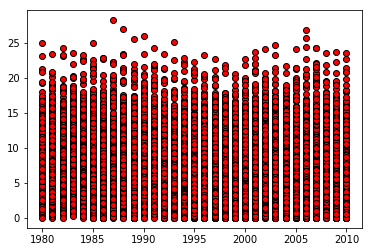

In [5]:
#slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)
#line = slope*xi+intercept

#plot all the values to a bar graph
ax=plt.scatter(year2, o_index2, marker='o', facecolors='red', edgecolors='black')

for label, x, y in zip (player2, year2, o_index2):
   #plt.annotate(label, xy= (x, y))

    plt.show()

In [7]:

#return data for just the 1980s

df_1980s = nba_positions_df.loc[(nba_positions_df['Year'] >= 1980) & (nba_positions_df['Year'] < 1990)]





                                                

In [8]:
#group by position for the decades and find the mean of the decade population
mean_1980s =  df_1980s.groupby(['Pos']).mean()

center_1980 = mean_1980s.loc["C", "PPG"]
#print(center_1980)
pf_1980 = mean_1980s.loc["PF", "PPG"]
#print(pf_1980)
sg_1980 = mean_1980s.loc["SG", "PPG"]
#print(sg_1980)
pg_1980 = mean_1980s.loc["PG", "PPG"]
#print(pg_1980)
sf_1980 = mean_1980s.loc["SF", "PPG"]
#print(sf_1980)
#sf_1980.dtypes


Text(0, 0.5, 'Points Per Game')

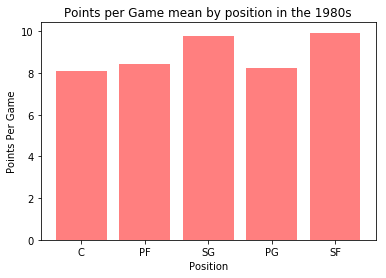

In [9]:
 # Create an array that contains the player data for the 1980s
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]
x_axis = np.arange(len(users))

plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1980s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")



In [20]:
#random sampling from the 1980s
#df_1980s['Player'].sample(n=1153, random_state=1)
sample1_1980 = df_1980s.sample(n = 1153)

sample1_1980.head()

sample2_1980 = df_1980s.sample(n = 1153)
sample2_1980.head()
#write samples to csv
sample1_1980.to_csv('sample1_1980.csv')
sample2_1980.to_csv('sample2_1980.csv')

In [10]:
#return data for just the 1990s
df_1990s = nba_positions_df.loc[(nba_positions_df['Year'] >= 1990) & (nba_positions_df['Year'] < 2000)]

In [11]:
#group by position for the decades and find the mean of the decade population
mean_1990s =  df_1990s.groupby(['Pos']).mean()

center_1990 = mean_1990s.loc["C", "PPG"]
#print(center_1980)
pf_1990 = mean_1990s.loc["PF", "PPG"]
#print(pf_1980)
sg_1990 = mean_1990s.loc["SG", "PPG"]
#print(sg_1980)
pg_1990 = mean_1990s.loc["PG", "PPG"]
#print(pg_1980)
sf_1990 = mean_1990s.loc["SF", "PPG"]
#print(sf_1990)
#sf_1980.dtypes


Text(0, 0.5, 'Points Per Game')

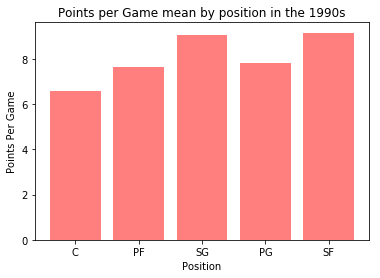

In [12]:
 # Create an array that contains the player data for the 1990s
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
x_axis2 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis2]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 1990s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")


In [31]:
#random sampling from the df_1990s
#df_1990s['Player'].sample(n=1153, random_state=1)
sample1_1990 = df_1990s.sample(n = 1153)

#sample1_1990.head()

sample2_1990 = df_1990s.sample(n = 1153)
#sample2_1990.head()

#write samples to a csv
sample1_1990.to_csv('sample1_1990.csv')
sample2_1990.to_csv('sample2_1990.csv')


In [13]:
#group by position for the decades and find the mean of the decade population
df_1990s.groupby(['Pos']).mean()

,Year,G,AST,BLK,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
Pos,,,,,,,,,,,,,,,,,
C,1994.700513,46.949744,47.827692,50.986667,153.495385,25.051282,390.995897,267.514872,5.015861,2.227791,7.243653,6.568422,0.801690,4.603863,0.858025,0.429463,2.576275
PF,1994.703327,48.900185,65.046211,29.851201,178.165434,32.256932,458.849353,277.450092,5.864831,2.223233,8.088064,7.648218,1.072322,4.756455,0.505945,0.562891,2.966145
PF-C,1996.400000,34.600000,19.400000,22.200000,57.400000,15.200000,141.000000,158.000000,3.164829,2.244527,5.409357,4.125114,0.548931,4.784210,0.648548,0.454263,1.674638
PF-SF,1991.250000,24.750000,11.750000,5.750000,42.500000,6.000000,98.250000,41.750000,2.432206,0.721679,3.153885,3.180138,0.344925,1.468672,0.244361,0.203008,1.371241
PG,1994.814739,49.962129,232.606960,6.740020,174.220061,54.952917,468.179120,113.732856,6.535422,1.083238,7.618660,7.808529,3.901487,1.927122,0.112445,0.928854,2.891549
PG-SG,1992.500000,29.500000,71.000000,5.000000,73.500000,24.000000,175.000000,58.000000,5.902764,1.139496,7.042260,7.217445,2.738943,2.101966,0.208845,0.786855,3.027641
SF,1994.739179,50.947836,98.189789,21.251942,212.332963,43.718091,555.219756,204.432852,7.083211,1.693296,8.776506,9.158750,1.616966,3.416021,0.350591,0.739034,3.486921
SF-PF,1995.000000,77.000000,279.000000,62.000000,371.000000,132.000000,976.000000,572.000000,10.079221,3.727273,13.806494,12.675325,3.623377,7.428571,0.805195,1.714286,4.818182
SF-SG,1993.500000,31.750000,67.750000,17.750000,97.000000,39.750000,289.500000,86.250000,5.633375,1.302479,6.935854,7.215981,1.696172,2.260702,0.402073,0.925255,2.429537


In [14]:
#return data for just the 2000s
df_2000s = nba_positions_df.loc[(nba_positions_df['Year'] >= 2000) & (nba_positions_df['Year'] <= 2010)]

In [34]:
#random sampling from the df_2000s
#df_2000s['Player'].sample(n=1153, random_state=1)
sample1_2000 = df_2000s.sample(n = 1153)

#sample1_2000.head()

sample2_2000 = df_2000s.sample(n = 1153)
#sample2_2000.head()
#save samples to csv
sample1_2000.to_csv('sample1_2000.csv')
sample2_2000.to_csv('sample2_2000.csv')

In [15]:
#group this decade by position and find the means
df_2000s.groupby(['Pos']).mean()

,Year,G,AST,BLK,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
Pos,,,,,,,,,,,,,,,,,
C,2005.159677,47.963710,42.829839,47.071774,139.406452,22.579839,356.731452,264.241129,4.577836,2.176606,6.754442,6.000724,0.713908,4.546429,0.804011,0.389436,2.345477
C-PF,2005.411765,51.058824,39.647059,39.000000,120.470588,29.941176,306.941176,249.235294,3.840049,2.056280,5.896329,5.024285,0.635531,4.234823,0.715725,0.492112,1.959431
C-SF,2008.000000,47.000000,28.000000,3.000000,60.000000,15.000000,178.000000,92.000000,2.897872,0.897872,3.795745,3.787234,0.595745,1.957447,0.063830,0.319149,1.276596
PF,2005.155573,48.004010,65.939856,30.358460,175.858059,31.440257,457.528468,266.286287,5.803890,2.149103,7.952993,7.567379,1.076989,4.583096,0.516255,0.536626,2.913272
PF-C,2007.083333,50.500000,53.250000,33.333333,130.250000,31.000000,319.166667,266.083333,4.584163,2.226501,6.810663,5.935122,0.952071,4.721220,0.575565,0.551144,2.391634
PF-SF,2006.545455,49.181818,47.636364,21.272727,115.090909,24.727273,311.545455,175.272727,4.459335,1.601938,6.061273,5.825301,0.818376,3.307401,0.443497,0.486426,2.179491
PG,2005.000807,48.711864,199.844229,6.135593,165.344633,44.399516,451.059726,116.415658,6.279986,1.070404,7.350390,7.598775,3.407771,2.014428,0.107268,0.774842,2.792896
PG-SF,2004.000000,66.000000,329.000000,22.000000,383.000000,51.000000,1022.000000,266.000000,12.416667,1.943939,14.360606,15.484848,4.984848,4.030303,0.333333,0.772727,5.803030
PG-SG,2006.055556,52.500000,153.500000,6.222222,177.833333,39.666667,494.833333,122.111111,6.482468,1.081688,7.564156,8.107405,2.575006,2.117610,0.101871,0.680276,2.922829


In [16]:
#group by position for the decades and find the mean of the decade population
mean_2000s =  df_2000s.groupby(['Pos']).mean()

center_2000 = mean_2000s.loc["C", "PPG"]
#print(center_1980)
pf_2000 = mean_2000s.loc["PF", "PPG"]
#print(pf_1980)
sg_2000 = mean_2000s.loc["SG", "PPG"]
#print(sg_1980)
pg_2000 = mean_2000s.loc["PG", "PPG"]
#print(pg_1980)
sf_2000 = mean_2000s.loc["SF", "PPG"]
#print(sf_2000)
#sf_1980.dtypes


Text(0, 0.5, 'Points Per Game')

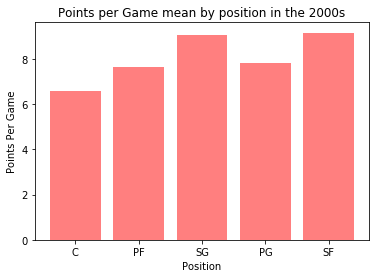

In [17]:
 # Create an array that contains the player data for the 1990s
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]
x_axis3 = np.arange(len(users))

plt.bar(x_axis2, users2, color='r', alpha=0.5, align="center")

tick_locations = [value for value in x_axis3]
plt.xticks(tick_locations, ["C", "PF", "SG", "PG", "SF"])
# Give our chart some labels and a tile
plt.title("Points per Game mean by position in the 2000s")
plt.xlabel("Position")
plt.ylabel("Points Per Game")


In [18]:
users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create a data frame using the mean averages for points per game by decade
raw_data = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980, pf_1980, sg_1980, pg_1980, sf_1980],
        '1990s_average': [center_1990, pf_1990, sg_1990, pg_1990, sf_1990],
        '2000s_average': [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]}
combine = pd.DataFrame(raw_data, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.076558,6.568422,6.000724
1,PF,8.422904,7.648218,7.567379
2,SG,9.752490,9.039414,9.078829
3,PG,8.216661,7.808529,7.598775
4,SF,9.931152,9.158750,8.793819


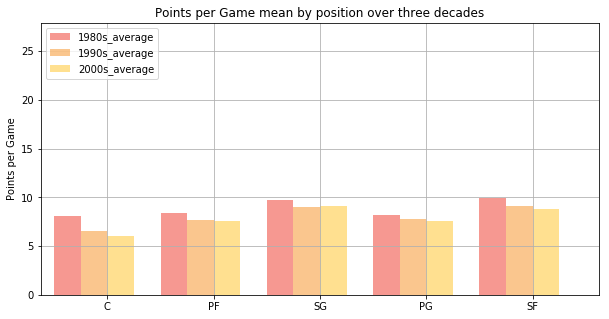

In [19]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine['1980s_average'] data,
        combine['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in positions
        label=combine['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine['1990s_average'] data,
        combine['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine['2000s_average'] data,
        combine['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in positions
        label=combine['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Points per Game')

# Set the chart's title
ax.set_title('Points per Game mean by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine['1980s_average'] + combine['1990s_average'] + combine['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

In [20]:

# find the over all index for each decade by position
center_1980_overall = mean_1980s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1980_overall = mean_1980s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1980_overall = mean_1980s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1980_overall = mean_1980s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1980_overall = mean_1980s.loc["SF", "Overall_Index"]



center_1990_overall = mean_1990s.loc["C", "Overall_Index"]
#print(center_1980)
pf_1990_overall = mean_1990s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_1990_overall = mean_1990s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_1990_overall = mean_1990s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_1990_overall = mean_1990s.loc["SF", "Overall_Index"]


center_2000_overall = mean_2000s.loc["C", "Overall_Index"]
#print(center_1980)
pf_2000_overall = mean_2000s.loc["PF", "Overall_Index"]
#print(pf_1980)
sg_2000_overall = mean_2000s.loc["SG", "Overall_Index"]
#print(sg_1980)
pg_2000_overall = mean_2000s.loc["PG", "Overall_Index"]
#print(pg_1980)
sf_2000_overall = mean_2000s.loc["SF", "Overall_Index"]



In [21]:
#users = [center_1980, pf_1980, sg_1980, pg_1980, sf_1980]  
#users2 = [center_1990, pf_1990, sg_1990, pg_1990, sf_1990]
#users3 = [center_2000, pf_2000, sg_2000, pg_2000, sf_2000]

#create overall index dataframe
raw_data1 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_overall, pf_1980_overall, sg_1980_overall, pg_1980_overall, sf_1980_overall],
        '1990s_average': [center_1990_overall, pf_1990_overall, sg_1990_overall, pg_1990_overall, sf_1990_overall],
        '2000s_average': [center_2000_overall, pf_2000_overall, sg_2000_overall, pg_2000_overall, sf_2000_overall]}
combine2 = pd.DataFrame(raw_data1, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine2

,Positions,1980s_average,1990s_average,2000s_average
0,C,8.756753,7.243653,6.754442
1,PF,8.845736,8.088064,7.952993
2,SG,8.881639,8.314781,8.388611
3,PG,8.050170,7.618660,7.350390
4,SF,9.419639,8.776506,8.466761


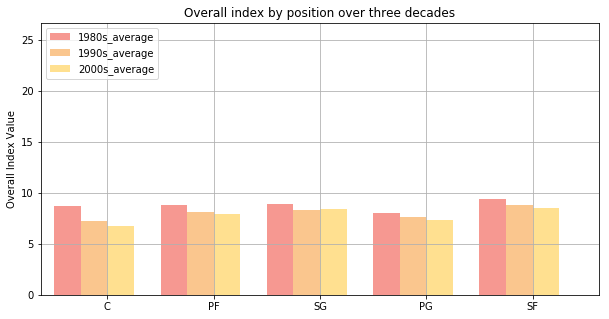

In [22]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine2['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine2['1980s'] data,
        combine2['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine2['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine2['1990s_average'] data,
        combine2['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in position
        label=combine2['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine2['2000s_average'] data,
        combine2['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine2['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Overall Index Value')

# Set the chart's title
ax.set_title('Overall index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine2['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine2['1980s_average'] + combine2['1990s_average'] + combine2['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

In [23]:
# find the defensive index for each decade by position
center_1980_defensive = mean_1980s.loc["C", "D_Index"]
#print(center_1980)
pf_1980_defensive = mean_1980s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1980_defensive = mean_1980s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1980_defensive = mean_1980s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1980_defensive = mean_1980s.loc["SF", "D_Index"]



center_1990_defensive = mean_1990s.loc["C", "D_Index"]
#print(center_1980)
pf_1990_defensive = mean_1990s.loc["PF", "D_Index"]
#print(pf_1980)
sg_1990_defensive = mean_1990s.loc["SG", "D_Index"]
#print(sg_1980)
pg_1990_defensive = mean_1990s.loc["PG", "D_Index"]
#print(pg_1980)
sf_1990_defensive = mean_1990s.loc["SF", "D_Index"]


center_2000_defensive = mean_2000s.loc["C", "D_Index"]
#print(center_1980)
pf_2000_defensive = mean_2000s.loc["PF", "D_Index"]
#print(pf_1980)
sg_2000_defensive = mean_2000s.loc["SG", "D_Index"]
#print(sg_1980)
pg_2000_defensive = mean_2000s.loc["PG", "D_Index"]
#print(pg_1980)
sf_2000_defensive = mean_2000s.loc["SF", "D_Index"]


In [24]:
#create defensive_index dataframe
raw_data2 = {'Positions': ['C', 'PF', 'SG', 'PG', 'SF'],
        '1980s_average': [center_1980_defensive, pf_1980_defensive, sg_1980_defensive, pg_1980_defensive, sf_1980_defensive],
        '1990s_average': [center_1990_defensive, pf_1990_defensive, sg_1990_defensive, pg_1990_defensive, sf_1990_defensive],
        '2000s_average': [center_2000_defensive, pf_2000_defensive, sg_2000_defensive, pg_2000_defensive, sf_2000_defensive]}
combine3 = pd.DataFrame(raw_data2, columns = ['Positions', '1980s_average', '1990s_average', '2000s_average'])
combine3

,Positions,1980s_average,1990s_average,2000s_average
0,C,2.546427,2.227791,2.176606
1,PF,2.366764,2.223233,2.149103
2,SG,1.188373,1.242891,1.313329
3,PG,1.127939,1.083238,1.070404
4,SF,1.732006,1.693296,1.681302


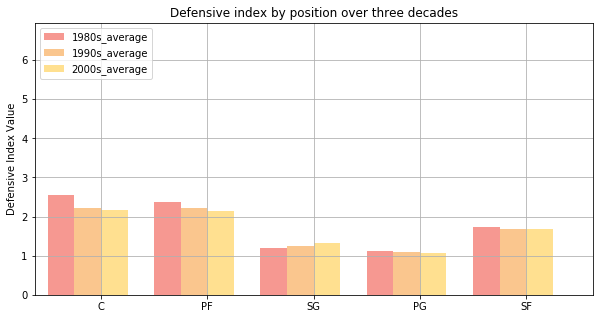

In [25]:
#compile plots together on one chart


# Setting the positions and width for the bars
pos = list(range(len(combine3['1980s_average']))) 
width = 0.25 
    
# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 1980s data,
# in position pos,
plt.bar(pos, 
        #using combine3['1980s_average'] data,
        combine3['1980s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in position
        label=combine3['Positions'][0]) 

# Create a bar with 1990s data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using combine3['1990s_average'] data,
        combine3['1990s_average'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#F78F1E', 
        # with label the second value in positions
        label=combine3['Positions'][1]) 

# Create a bar with 2000s data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos], 
        #using combine3['2000s_average'] data,
        combine3['2000s_average'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#FFC222', 
        # with label the third value in position
        label=combine3['Positions'][2]) 

# Set the y axis label
ax.set_ylabel('Defensive Index Value')

# Set the chart's title
ax.set_title('Defensive index by position over three decades')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(combine3['Positions'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(combine3['1980s_average'] + combine3['1990s_average'] + combine3['2000s_average'])] )

# Adding the legend and showing the plot
plt.legend(['1980s_average', '1990s_average', '2000s_average'], loc='upper left')
plt.grid()
plt.show()

In [2]:
import statsmodels.formula.api as sm

y = df_1980s.Overall_Index
x = df_1980s.PTS
x1 = df_1980s.AST
x2 = df_1980s.FG
x3 = df_1980s.BLK
x4 = df_1980s.TRB
x5 = df_1980s.STL


>> results = sm.ols(formula='Y ~ X1', data=df_1980s).fit()
>>> Y_pred = results.predict(df_1980s[["X1"]])
>>> residual = df["Y"].values-Y_pred
>>> residual

SyntaxError: invalid syntax (<ipython-input-2-d933dffcf15f>, line 12)

In [3]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs =df_1980s.Overall_Index
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")

NameError: name 'df_1980s' is not defined

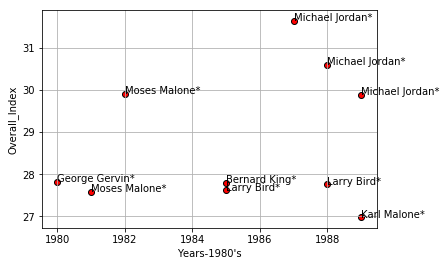

In [27]:
#10 highest overall scores for overall index 1980s
df_1980s.nlargest(10, ['Overall_Index'])
df_1980s_max = df_1980s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1980s_max.Year

# Create a random array of data that we will use for our y values
o_index2 = df_1980s_max.Overall_Index.tolist()


player2 = df_1980s_max.Player.tolist()

year2= df_1980s_max.Year.tolist()


ax=plt.scatter(year2, o_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player2, year2, o_index2):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1980's")
plt.ylabel('Overall_Index')

plt.grid()
plt.show()





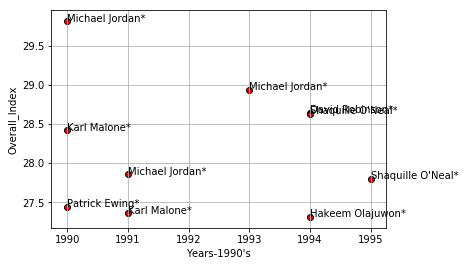

In [28]:
#10 highest overall scores for overall index 1990s

#10 highest overall scores for overall index 1980s
df_1990s.nlargest(10, ['Overall_Index'])
df_1990s_max = df_1990s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1990s_max.Year

# Create a random array of data that we will use for our y values
o_index3 = df_1990s_max.Overall_Index.tolist()


player3 = df_1990s_max.Player.tolist()

year3= df_1990s_max.Year.tolist()


ax=plt.scatter(year3, o_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player3, year3, o_index3):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1990's")
plt.ylabel('Overall_Index')

plt.grid()
plt.show()


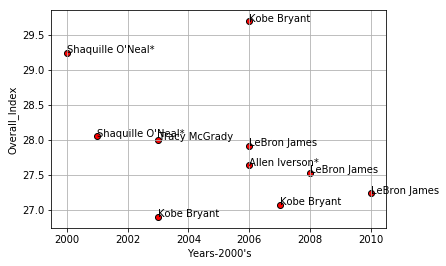

In [29]:
#10 highest overall scores for overall index 2000s

df_2000s.nlargest(10, ['Overall_Index'])
df_2000s_max = df_2000s.nlargest(10, ['Overall_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_2000s_max.Year

# Create a random array of data that we will use for our y values
o_index4 = df_2000s_max.Overall_Index.tolist()


player4 = df_2000s_max.Player.tolist()

year4= df_2000s_max.Year.tolist()


ax=plt.scatter(year4, o_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (player4, year4, o_index4):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-2000's")
plt.ylabel('Overall_Index')

plt.grid()
plt.show()


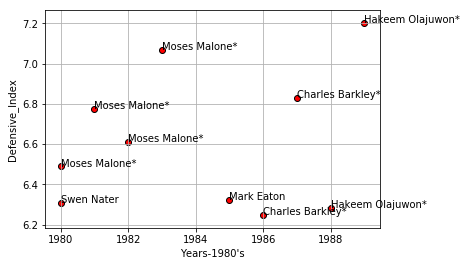

In [30]:
#10 highest overall scores for defensive index 1980s
df_1980s.nlargest(10, ['D_Index'])
df_1980s_maxd = df_1980s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1980s_maxd.Year

# Create a random array of data that we will use for our y values
d_index2 = df_1980s_maxd.D_Index.tolist()


dplayer2 = df_1980s_maxd.Player.tolist()

dyear2= df_1980s_maxd.Year.tolist()


ax=plt.scatter(dyear2, d_index2, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer2, dyear2, d_index2):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1980's")
plt.ylabel('Defensive_Index')
plt.grid()
plt.show()


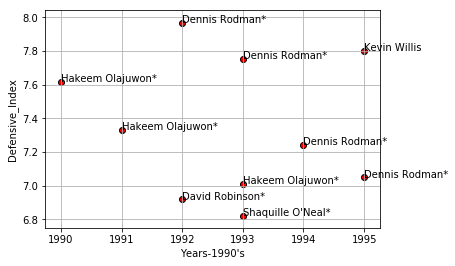

In [31]:
#10 highest overall scores for defensive index 1990s
df_1990s.nlargest(10, ['D_Index'])
df_1990s_maxd = df_1990s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1990s_maxd.Year

# Create a random array of data that we will use for our y values
d_index3 = df_1990s_maxd.D_Index.tolist()


dplayer3 = df_1990s_maxd.Player.tolist()

dyear3= df_1990s_maxd.Year.tolist()


ax=plt.scatter(dyear3, d_index3, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer3, dyear3, d_index3):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1990's")
plt.ylabel('Defensive_Index')

plt.grid()
plt.show()


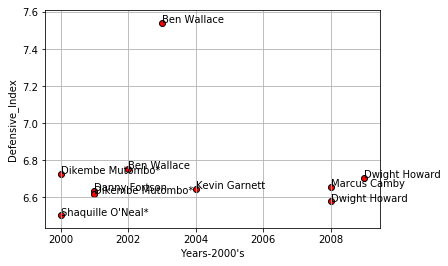

In [33]:
#10 highest overall scores for defensive index 2000s
df_2000s.nlargest(10, ['D_Index'])
df_2000s_maxd = df_2000s.nlargest(10, ['D_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_2000s_maxd.Year

# Create a random array of data that we will use for our y values
d_index4 = df_2000s_maxd.D_Index.tolist()


dplayer4 = df_2000s_maxd.Player.tolist()

dyear4= df_2000s_maxd.Year.tolist()


ax=plt.scatter(dyear4, d_index4, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer4, dyear4, d_index4):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-2000's")
plt.ylabel('Defensive_Index')
plt.grid()
plt.show()

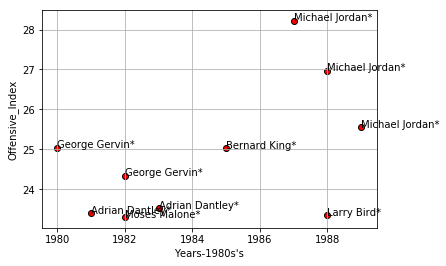

In [35]:
#10 highest offensive index 1980s
df_1980s.nlargest(10, ['O_Index'])
df_1980s_off = df_1980s.nlargest(10, ['O_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1980s_off.Year

# Create a random array of data that we will use for our y values
d_index45 = df_1980s_off.O_Index.tolist()


dplayer45 = df_1980s_off.Player.tolist()

dyear45= df_1980s_off.Year.tolist()


ax=plt.scatter(dyear45, d_index45, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer45, dyear45, d_index45):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1980s's")
plt.ylabel('Offensive_Index')
plt.grid()
plt.show()

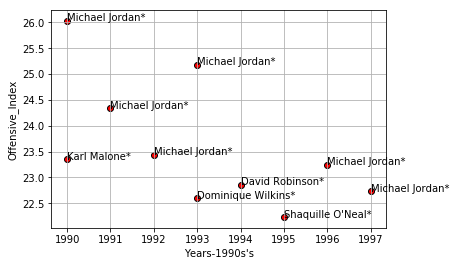

In [36]:
#10 highest offensive index 1990s
df_1990s.nlargest(10, ['O_Index'])
df_1990s_off = df_1990s.nlargest(10, ['O_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_1990s_off.Year

# Create a random array of data that we will use for our y values
d_index454 = df_1990s_off.O_Index.tolist()


dplayer454 = df_1990s_off.Player.tolist()

dyear454= df_1990s_off.Year.tolist()


ax=plt.scatter(dyear454, d_index454, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer454, dyear454, d_index454):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-1990s's")
plt.ylabel('Offensive_Index')
plt.grid()
plt.show()

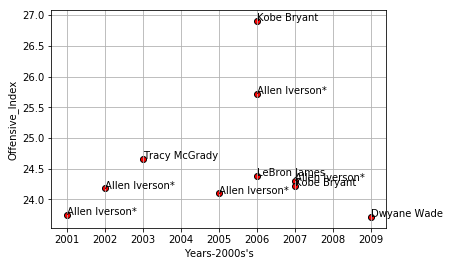

In [38]:
#10 highest offensive index 2000s
df_2000s.nlargest(10, ['O_Index'])
df_2000s_off = df_2000s.nlargest(10, ['O_Index'])
# The maximum x value for our chart will be 100
x_limit = 100

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = df_2000s_off.Year

# Create a random array of data that we will use for our y values
d_index4545 = df_2000s_off.O_Index.tolist()


dplayer4545 = df_2000s_off.Player.tolist()

dyear4545= df_2000s_off.Year.tolist()


ax=plt.scatter(dyear4545, d_index4545, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (dplayer4545, dyear4545, d_index4545):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Years-2000s's")
plt.ylabel('Offensive_Index')
plt.grid()
plt.show()

In [70]:
#calculate the std for the overall index for the whole data set

print("overall index analysis")
overall_total = nba_positions_df.Overall_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([overall_total]))
#set std to variable 
normal = (np.std([overall_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite = normal * 2
#all star seasons are two standard deviations from the mean 
all_star = normal * 4
#all time seasons are two standard deviations from the mean
all_time = normal *5
print(f"an elite player will have an over_all index of{elite} or higher")
print(f"an all star player will have an over_all index of{all_star} or higher")
print(f"an all time player will have an over_all index of{all_time} or higher")
      

overall index analysis
standard deviation of the data set is
5.576705262543531
an elite player will have an over_all index of11.153410525087063 or higher
an all star player will have an over_all index of22.306821050174126 or higher
an all time player will have an over_all index of27.883526312717656 or higher


In [49]:
nba_positions_df.head()

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
0,1980,82,C,371,280,Kareem Abdul-Jabbar*,835,81,2034,886,19.286585,5.642683,24.929268,24.804878,4.524390,10.804878,3.414634,0.987805,10.182927
1,1980,67,PF,87,12,Tom Abernethy,153,35,362,191,4.270149,1.350746,5.620896,5.402985,1.298507,2.850746,0.179104,0.522388,2.283582
2,1980,75,C,322,55,Alvan Adams,465,108,1118,609,11.913333,3.900000,15.813333,14.906667,4.293333,8.120000,0.733333,1.440000,6.200000
3,1980,80,PG,671,10,Tiny Archibald*,383,106,1131,197,12.052500,1.420000,13.472500,14.137500,8.387500,2.462500,0.125000,1.325000,4.787500
4,1980,26,C,40,15,Dennis Awtrey,27,12,86,115,2.726923,2.080769,4.807692,3.307692,1.538462,4.423077,0.576923,0.461538,1.038462


In [58]:
#over_all index data frame 2 STD from the mean overall index
elites_df_2_std = nba_positions_df[nba_positions_df.iloc[:,12]>= elite]
elites_df_2_std.head()
print(f"There are {len(elites_df_2_std)} individual seasons where a players overall index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean overall index

elites_df_4_std = nba_positions_df[nba_positions_df.iloc[:,12]>= all_star]
print(f"There are {len(elites_df_4_std)} individual seasons where a players overall index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean overall index
elites_df_5_std = nba_positions_df[nba_positions_df.iloc[:,12]>= all_time]
print(f"There are {len(elites_df_5_std)} individual seasons where a players overall index was greater than 5 STD from the league mean")



There are 3940 individual seasons where a players overall index was greater than 2 STD from the league mean
There are 243 individual seasons where a players overall index was greater than 4 STD from the league mean
There are 14 individual seasons where a players overall index was greater than 5 STD from the league mean


Current size:


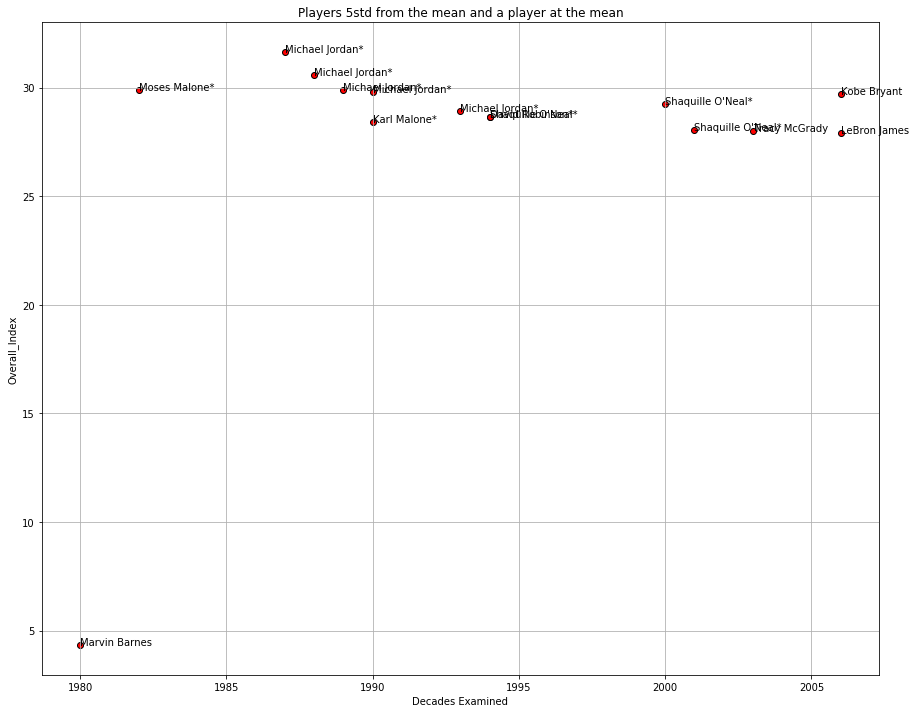

In [129]:
#create a graph that shows all players at 5std and one player at the mean for overall index
elites_df_5_std
#get the mean of the column
mean_decades = nba_positions_df.Overall_Index.mean()
#find a player in the general population who has a overall index <= the mean
average_player = nba_positions_df[nba_positions_df.iloc[:,12] <= mean_decades]
#pick a player at random by index
scrub = average_player.iloc[[4]]
#add that scrubplayer to the elite dataframe
elite_add1 = elites_df_5_std.append(scrub)




#overall index =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set axis = the years in question
x_axis = elite_add1.Year

# Create a variable for y values--overall index
new_var = elite_add1.Overall_Index.tolist()

#set variable to the players and list their names
new_var1 = elite_add1.Player.tolist()
#set variable and list their years
new_var2 = elite_add1.Year.tolist()

#create scatter with x and y values
ax=plt.scatter(new_var2, new_var, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var1, new_var2, new_var):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Overall_Index')
plt.title('Players 5std from the mean and a player at the mean')
def addtext(new_var1):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var1, rotation=360)
plt.grid()




# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 14
fig_size[1] = 11
plt.rcParams["figure.figsize"] = fig_size

plt.show()


In [71]:
#calculate the std for the offensive index for the whole data set
print("offensive index analysis")
offensive_total = nba_positions_df.O_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([offensive_total]))
#set std to variable 
normal1 = (np.std([offensive_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite1 = normal1 * 2
all_star1 = normal1 * 4
all_time1 = normal1 *5
print(f"an elite player will have an over_all index of {elite1} or higher")
print(f"an all star player will have an over_all index of {all_star1} or higher")
print(f"an all time player will have an over_all index of {all_time1} or higher")
      

offensive index analysis
standard deviation of the data set is
4.709938760021974
an elite player will have an over_all index of 9.419877520043949 or higher
an all star player will have an over_all index of 18.839755040087898 or higher
an all time player will have an over_all index of 23.54969380010987 or higher


In [72]:
#offensive index data frame 2 STD from the mean offensive index
elites_df_2_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= elite1]
elites_df_2_std1.head()
print(f"There are {len(elites_df_2_std1)} individual seasons where a players offensive index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean offensive index

elites_df_4_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= all_star1]
print(f"There are {len(elites_df_4_std1)} individual seasons where a players offensive index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean offensive index
elites_df_5_std1 = nba_positions_df[nba_positions_df.iloc[:,10]>= all_time1]
print(f"There are {len(elites_df_5_std1)} individual seasons where a players offensive index was greater than 5 STD from the league mean")



There are 3501 individual seasons where a players offensive index was greater than 2 STD from the league mean
There are 219 individual seasons where a players offensive index was greater than 4 STD from the league mean
There are 19 individual seasons where a players offensive index was greater than 5 STD from the league mean


Current size:


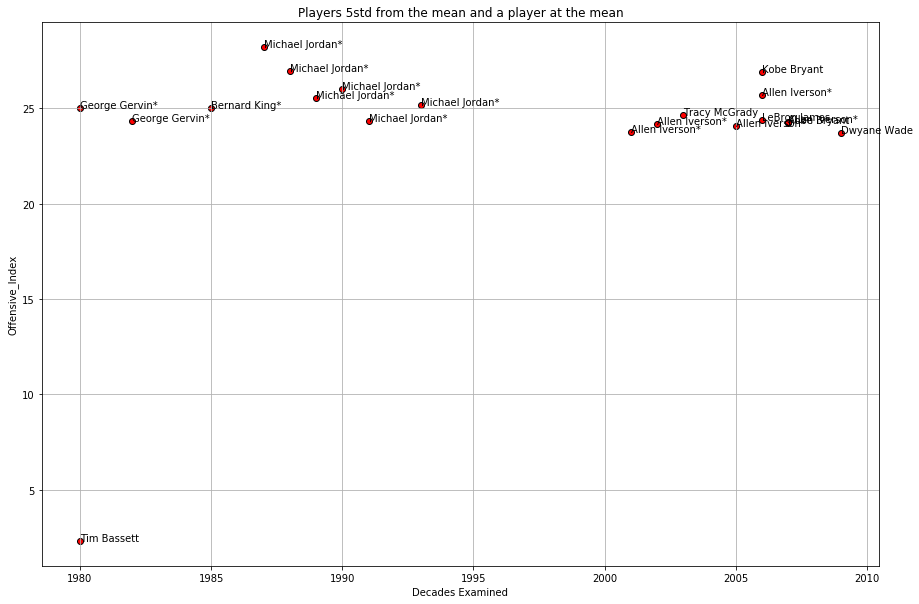

In [126]:
elites_df_5_std1
#get the mean of the o_index for the general population 
mean_decades1 = nba_positions_df.O_Index.mean()
#set variable and capute a player from general pop who has a o_index less than the mean
average_player1 = nba_positions_df[nba_positions_df.iloc[:,10] <= mean_decades1]
#pick a player at random
scrub1 = average_player1.iloc[[5]]
#add them to the elite graph
elite_add2 = elites_df_5_std1.append(scrub1)


# now we have a overall index df =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set x axis = to years 
x_axis = elite_add2.Year

# Create a variable for y values
new_var11 = elite_add2.O_Index.tolist()

#variable for players
new_var22 = elite_add2.Player.tolist()
#variable for years

new_var33 = elite_add2.Year.tolist()

#plot
ax=plt.scatter(new_var33, new_var11, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var22, new_var33, new_var11):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Offensive_Index')
plt.title('Players 5std from the mean and a player at the mean')
def addtext(new_var22):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var22, rotation=360)
plt.grid()

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size
plt.show()

In [74]:
#calculate the std for the defensive index for the whole data set
print("Defensive index analysis")
defensive_total = nba_positions_df.D_Index.tolist()
print("standard deviation of the data set is") 
print(np.std([defensive_total]))
#set std to variable 
normal2 = (np.std([defensive_total]))
#two times standard deviation
#elite seasons are two standard deviations from the mean 
elite2 = normal2 * 2
all_star2 = normal2 * 4
all_time2 = normal2 *5
all_time3 = normal2 *6
print(f"an elite player will have an defensive index of {elite2} or higher")
print(f"an all star player will have an defensive index of {all_star2} or higher")
print(f"an all time player will have an defensive index of {all_time2} or higher")
print(f"an ridiculous player will have an defensive index of {all_time3} or higher")

Defensive index analysis
standard deviation of the data set is
1.208454950887623
an elite player will have an defensive index of 2.416909901775246 or higher
an all star player will have an defensive index of 4.833819803550492 or higher
an all time player will have an defensive index of 6.042274754438115 or higher
an ridiculous player will have an defensive index of 7.250729705325738 or higher


In [75]:
#defensive frame 2 STD from the mean defensive index
elites_df_2_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= elite2]
elites_df_2_std12.head()
print(f"There are {len(elites_df_2_std12)} individual seasons where a players defensive index was greater than 2 STD from the league mean")



#over_all index data frame 4 STD from the mean overall index

elites_df_4_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_star2]
print(f"There are {len(elites_df_4_std12)} individual seasons where a players defensive index was greater than 4 STD from the league mean")

#over_all index data frame 5 STD from the mean overall index
elites_df_5_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_time2]
print(f"There are {len(elites_df_5_std12)} individual seasons where a players defensive index was greater than 5 STD from the league mean")

elites_df_6_std12 = nba_positions_df[nba_positions_df.iloc[:,11]>= all_time3]
print(f"There are {len(elites_df_6_std12)} individual seasons where a players defensive index was greater than 6 STD from the league mean")

There are 3462 individual seasons where a players defensive index was greater than 2 STD from the league mean
There are 340 individual seasons where a players defensive index was greater than 4 STD from the league mean
There are 63 individual seasons where a players defensive index was greater than 5 STD from the league mean
There are 6 individual seasons where a players defensive index was greater than 6 STD from the league mean


In [67]:
elites_df_6_std12

,Year,G,Pos,AST,BLK,Player,FG,STL,PTS,TRB,O_Index,D_Index,Overall_Index,PPG,ASTPG,RPG,BLKPG,STLPG,FGPG
4103,1990,82,C,234,376,Hakeem Olajuwon*,806,174,1995,1149,18.584146,7.617073,26.201220,24.329268,2.853659,14.012195,4.585366,2.121951,9.829268
4555,1991,56,C,131,221,Hakeem Olajuwon*,487,121,1187,770,16.175000,7.332143,23.507143,21.196429,2.339286,13.750000,3.946429,2.160714,8.696429
5062,1992,82,PF,191,70,Dennis Rodman*,342,68,800,1530,7.712195,7.968293,15.680488,9.756098,2.329268,18.658537,0.853659,0.829268,4.170732
5508,1993,62,PF,102,45,Dennis Rodman*,183,48,468,1132,5.908065,7.753226,13.661290,7.548387,1.645161,18.258065,0.725806,0.774194,2.951613
6539,1995,2,PF,3,3,Kevin Willis,16,1,42,36,15.800000,7.800000,23.600000,21.000000,1.500000,18.000000,1.500000,0.500000,8.000000
10697,2003,73,C,120,230,Ben Wallace,210,104,506,1126,5.468493,7.542466,13.010959,6.931507,1.643836,15.424658,3.150685,1.424658,2.876712


In [104]:
#create elite defenders dataframe we are removing kevin willis as he only played 2 games
elite_defenders = elites_df_6_std12.drop([6539])

Current size:


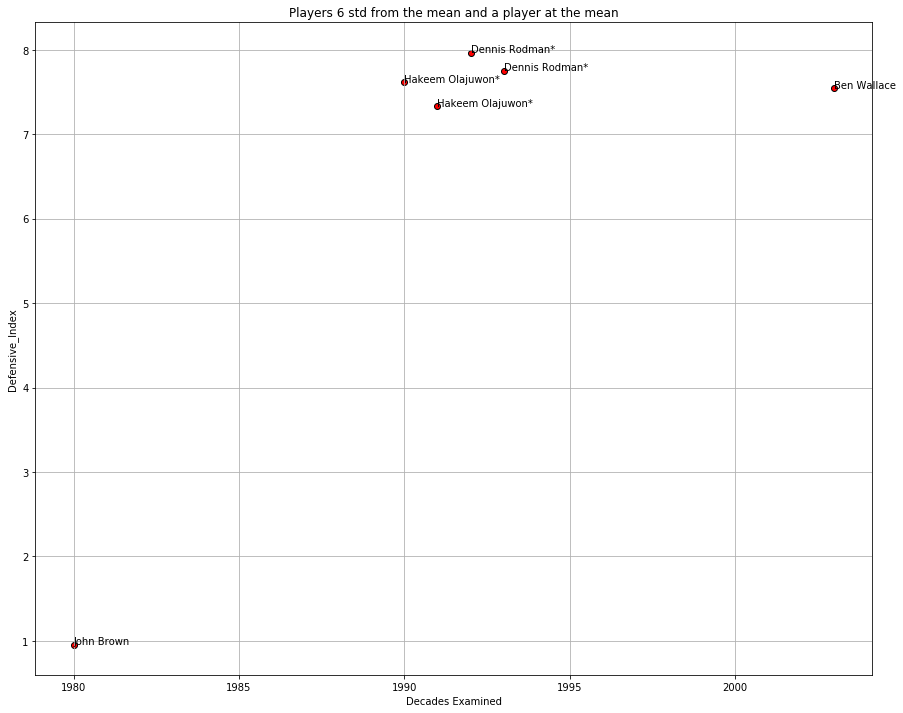

In [127]:
elite_defenders
#set variable = mean of the d index for general population 
mean_decades2 = nba_positions_df.D_Index.mean()
#find a player who has defensive index value <= the population mean
average_player2 = nba_positions_df[nba_positions_df.iloc[:,11] <= mean_decades2]
#pick player at random
scrub2 = average_player2.iloc[[20]]
#add him to elite df
elite_add3 = elite_defenders.append(scrub2)




#elite defenders =5std from mean plus one lousy player
# The maximum x value for our chart will be 100
x_limit = 100

# set x axis = to years
x_axis = elite_add3.Year

# Create a variable for y values
new_var111 = elite_add3.D_Index.tolist()

#varibale for player name
new_var222 = elite_add3.Player.tolist()
#variable for years
new_var333 = elite_add3.Year.tolist()

#plot
ax=plt.scatter(new_var333, new_var111, marker='o', facecolors='red', edgecolors='black')
for label, x, y in zip (new_var222, new_var333, new_var111):
   plt.annotate(label, xy= (x, y))
plt.xlabel("Decades Examined")
plt.ylabel('Defensive_Index')
plt.title('Players 6 std from the mean and a player at the mean')
def addtext(new_var222):
    plt.text(0.5, 0.5, 'Marvin Barnes', new_var222, rotation=360)
plt.grid()
#fig.set_size_inches(10, 10)
#fig= plt.figure(figsize=(100,100))


# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print ("Current size:"), fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

plt.show()